In [1]:
from proj_utils.fake_input_generator import generator as fake_generator
from simulated_annealing.solvers import VRP_solver_factory
from proj_utils.path import print_path
import matplotlib.pyplot as plt
%matplotlib widget

# Simulated Annealing Solution

In [2]:
adjacency_matrix, demand_list, delivery_window_list, vehicle_capacity,points = fake_generator(100)

In [3]:
solver = VRP_solver_factory(adjacency_matrix, demand_list, delivery_window_list, vehicle_capacity)

In [9]:
sol = solver(1000000)

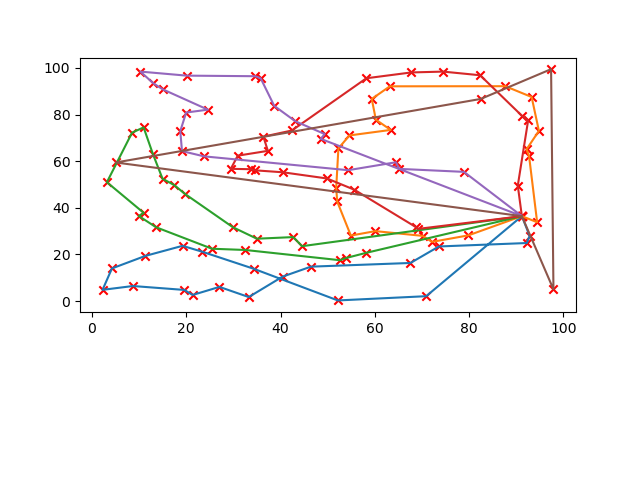

In [10]:
print_path(points, sol)